# Simulation of heat diffusion in a graph

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [2]:
def make_grid(n, t_min, t_max_v, t_max_h):
    """Make the graph."""
    grid = np.zeros((n, n))
    grid[:, :] = t_min
    grid[:, 0] = t_max_v
    grid[:, n-1] = t_max_v
    grid[0, :] = t_max_h
    grid[n-1, :] = t_max_h
    return grid

In [3]:
def plot_grid(grid, ax, vmin=0, vmax=10):
    """Plot the temperatures of the grid."""
    sns.heatmap(grid, vmin=vmin, vmax=vmax,
                ax=ax, cbar=False)
    ax.set_xticks(ticks=[])
    ax.set_yticks(ticks=[])

In [4]:
def one_step(grid, c):
    """Calculate next step of the temperatures
    of the grid using graph diffusion equation."""
    grid = grid.copy()
    grid_old = grid.copy()
    n = grid.shape[0]
    for i in range(1, n-1):
        for j in range(1, n-1):
            grid[i, j] += c*(grid_old[i+1, j]
                             + grid_old[i-1, j]
                             + grid_old[i, j+1]
                             + grid_old[i, j-1]
                             - 4*grid[i, j])
    return grid

In [5]:
def whole_process(
    c=0.1, n=32, t_min=0,
    t_max_v=10, t_max_h=10, tol=10**(-2)
):
    
    grid = make_grid(
        n=n, t_min=t_min, t_max_v=t_max_v,
        t_max_h=t_max_h
    )
    
    grids = [grid]
    diff = 1
    while diff > tol:
        grid = one_step(grid, c)
        grids.append(grid)
        diff = np.linalg.norm(grids[-1] - grids[-2], ord='fro')
    
    fig, axes = plt.subplots(2, 4, figsize=(15, 6))

    indices = list(np.linspace(0, len(grids)-1, num=8,
                               endpoint=True, dtype=np.int))
    for j, i in enumerate(indices):
        plot_grid(
            grids[i],
            axes.reshape(-1)[j],
            vmin=t_min,
            vmax=max([t_max_h, t_max_v])
        )
            
    fig.colorbar(
        axes[0, 0].collections[0],
        ax=axes.ravel().tolist()
    )
    
    plt.show()
    
    print('{} steps with tolerance {}.'.format(len(grids), tol))
    return grids

## a) First diffusion

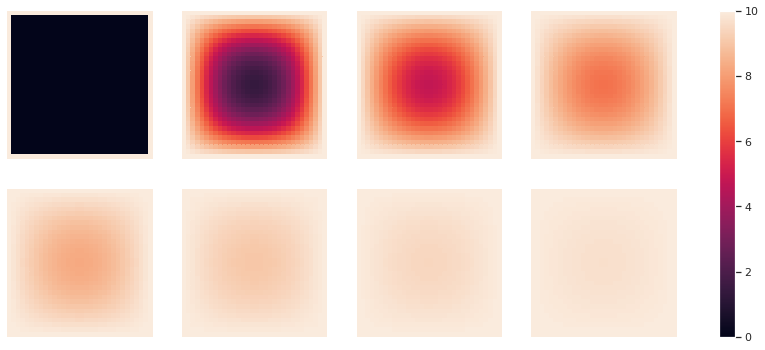

1921 steps with tolerance 0.01.


In [6]:
_ = whole_process()

## b) Second diffusion with different constant temperatures

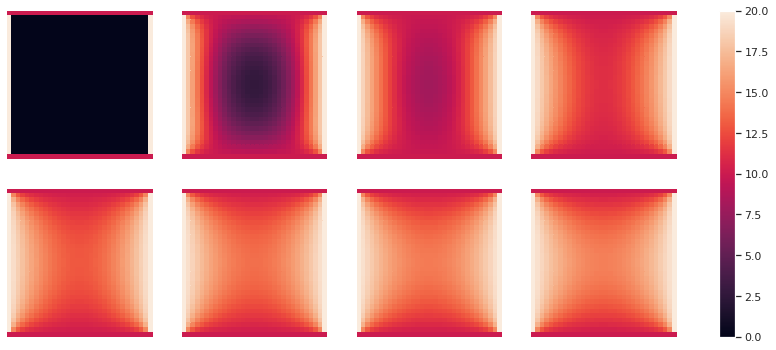

2118 steps with tolerance 0.01.


In [7]:
_ = whole_process(t_max_v=20)